In [ ]:
%load_ext autoreload
%autoreload 2

# Advanced imagery download

To have more control over data processing and downloading using EOTDL, we can use advanced imagery download.


Uncomment the following line to install eotdl if needed.


In [ ]:
#!pip install eotdl

First, we can check which data collections are supported in the EOTDL.

In [57]:
from eotdl.access import SUPPORTED_COLLECTION_IDS

SUPPORTED_COLLECTION_IDS

['sentinel-1-grd',
 'sentinel-2-l1c',
 'sentinel-2-l2a',
 'dem',
 'hls',
 'landsat-ot-l2']

We can generate default parameters for the desired collection, and then modify them as needed. In our case, we will change the output format to JPG and use an evalscript that returns only the red, green, and blue bands, resulting in a naturally colored product. We also want to use only products that have less than 30% of the image covered with clouds.

In [58]:
from eotdl.access import OUTPUT_FORMAT, get_default_parameters, DATA_COLLECTION_ID, EvalScripts

parameters = get_default_parameters(DATA_COLLECTION_ID.SENTINEL_2_L2A)
parameters.MAX_CLOUD_COVERAGE = 30
parameters.OUTPUT_FORMAT = OUTPUT_FORMAT.JPG
parameters.EVALSCRIPT = EvalScripts.SENTINEL_2_L2A_TRUE_COLOR

For the search, we will use the same area and time range as in the previous [notebook](11_download_sentinel_imagery.ipynb), for area of Jaca in Spain, between January 1 and January 10, 2020.


In [59]:
dates = ("2020-01-01", "2020-01-10")
jaca_bounding_box = (-0.557034, 42.569409, -0.547706, 42.57571)

Similar to the simple search, with the difference that here we will use the parameters we defined earlier instead of the collection ID.

In [60]:
from eotdl.access import advanced_imagery_search

results = advanced_imagery_search(dates, jaca_bounding_box, parameters)
list(results)

[{'id': 'S2B_MSIL2A_20200109T110329_N0213_R094_T30TXN_20200109T121919',
  'properties': {'datetime': '2020-01-09T11:09:11Z', 'eo:cloud_cover': 17.46}},
 {'id': 'S2B_MSIL2A_20200109T110329_N0213_R094_T30TYN_20200109T121919',
  'properties': {'datetime': '2020-01-09T11:09:07Z', 'eo:cloud_cover': 0.01}},
 {'id': 'S2B_MSIL2A_20200106T105339_N0213_R051_T30TXN_20200106T121433',
  'properties': {'datetime': '2020-01-06T10:59:14Z', 'eo:cloud_cover': 0.95}},
 {'id': 'S2B_MSIL2A_20200106T105339_N0213_R051_T30TYN_20200106T121433',
  'properties': {'datetime': '2020-01-06T10:59:11Z', 'eo:cloud_cover': 0.08}},
 {'id': 'S2A_MSIL2A_20200101T105441_N0213_R051_T30TXN_20200101T121106',
  'properties': {'datetime': '2020-01-01T10:59:13Z', 'eo:cloud_cover': 5.73}},
 {'id': 'S2A_MSIL2A_20200101T105441_N0213_R051_T30TYN_20200101T121106',
  'properties': {'datetime': '2020-01-01T10:59:11Z', 'eo:cloud_cover': 4.89}}]

We have several available images. Let's download all of them. We will use the same parameters we used for searching.

In [61]:
from eotdl.access import advanced_imagery_download

advanced_imagery_download("data/jaca", dates, jaca_bounding_box, parameters)

Let's take a look at one of the images.


In [62]:
from glob import glob

first_img = glob("data/jaca/*.jpg")[0]
first_img

'data/jaca\\sentinel-2-l2a_2020-01-01.jpg'

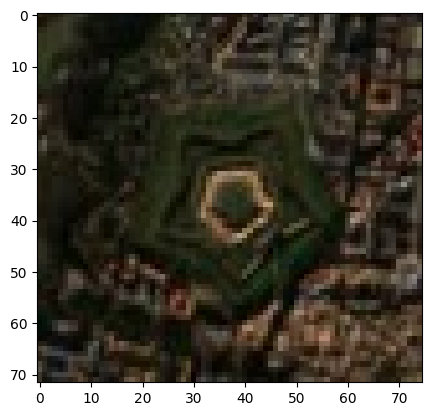

In [63]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(first_img)
plt.imshow(img)

If we want to display a different combination of bands in the image, we can use our own evalscript instead of the pre-defined one.

In [64]:
from eotdl.access import OUTPUT_FORMAT, get_default_parameters, DATA_COLLECTION_ID

parameters = get_default_parameters(DATA_COLLECTION_ID.SENTINEL_2_L2A)
parameters.MAX_CLOUD_COVERAGE = 30
parameters.OUTPUT_FORMAT = OUTPUT_FORMAT.JPG
parameters.EVALSCRIPT = """
                //VERSION=3

                function setup(ds) {
                return {
                    input: ["B03", "B04", "B08","dataMask"],
                    output: { bands: 4 }
                };
                }

                function evaluatePixel(samples) {
                    return [samples.B08, samples.B04, samples.B03,samples.dataMask];
                }
                """

Let's process, download, and visualize the results.

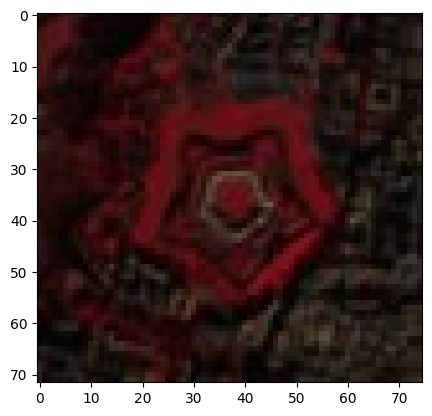

In [65]:
from eotdl.access import advanced_imagery_download
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

advanced_imagery_download("data/jaca", dates, jaca_bounding_box, parameters)
raster = glob("data/jaca/*.jpg")[0]
img = mpimg.imread(first_img)
plt.imshow(img)